<a href="https://colab.research.google.com/github/usadhana025/Hands_on_ml/blob/master/Notebooks/end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tarfile
import pandas as pd
import io
import urllib.request
import os


# ***Download the data***

In [2]:
# GitHub raw URL to the housing tar file
github_url = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz'

# Temporary file path to save the downloaded tar file
temp_tar_path = 'housing.tgz'

# Download the tar file from GitHub
urllib.request.urlretrieve(github_url, temp_tar_path)


('housing.tgz', <http.client.HTTPMessage at 0x7ddd341c9240>)

In [3]:
# Name of the CSV file within the tar archive
csv_filename = 'housing.csv'

df = None

# Open the tar file
with tarfile.open(temp_tar_path, 'r:gz') as tar:
    # Extract the CSV file
    csv_file = tar.extractfile(csv_filename)

    if csv_file is not None:
        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_file)
            # Check if the DataFrame is empty
            if df.empty:
                raise ValueError(f"The CSV file '{csv_filename}' is empty.")
        except Exception as e:
            print(f"Error reading the CSV file: {e}")
    else:
        raise FileNotFoundError(f"{csv_filename} not found in the tar archive")

# Clean up the temporary tar file
os.remove(temp_tar_path)

# Display the DataFrame
if df is not None:
    print(df.head(5))
else:
    print("The DataFrame is None.")


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# How many district belong to each category of ocean_proximity
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# Summary of numerical attributes: here null values got ignored
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# ***Visualize the data to have insights***

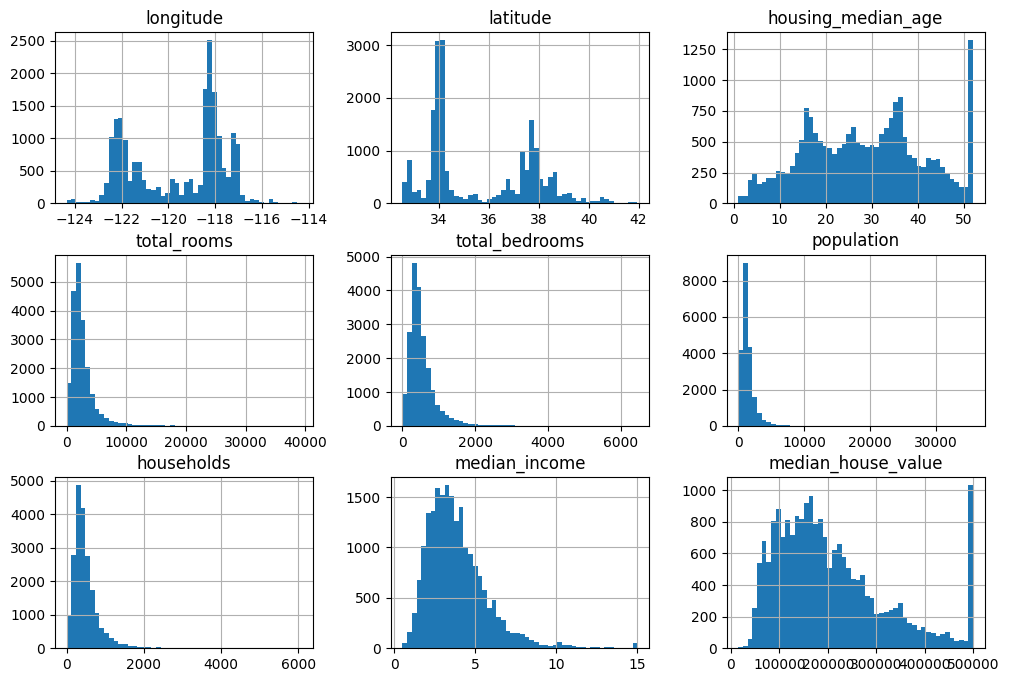

In [7]:
# visualize each attribute value range
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(12,8))
plt.show()

We need to keep test data aside before starting working on data; if not then machine learning algo will be too optimistic to find generalization error and we will launch the system which wil not perform as expected this is called data snooping bias

# ***Split the data using different ways***

In [8]:
import numpy as np

def suffle_and_split_Data(data,test_ratio):
  shuffled_ind=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_ind=shuffled_ind[:test_set_size]
  train_ind=shuffled_ind[test_set_size:]
  return data.iloc[train_ind],data.iloc[test_ind]



This custom function is totally random and we need to set seed to make it stable but still if you load new dataset it could be a problem, we can also use identifier instance and say below this 20% is testset. other than this we can also use sklearn train_test+split where we can set random_state as well

In [9]:
train_set,test_set=suffle_and_split_Data(df,0.2)
print(len(train_set))
print(len(test_set))
from sklearn.model_selection import train_test_split
X_set,y_set=train_test_split(df,test_size=0.2,random_state=42)
print("train via sklearn",len(X_set))
print("test via sklearn",len(y_set))

16512
4128
train via sklearn 16512
test via sklearn 4128


Using the above library is fine if dataset is large enough, but if not we need to take care of sampling bias. One way to resolve sampling bias is stratified sampling where population is divided into small homogeneous group called strata and the right no. of instance are sampled from each stratum to make sure test set is representation of the population.

Consider if median income is important attr. to decide the median house price , so we have to make sure that various income category is properly taking into consideration. However we can see income is continuous values so we need to conver it into a category

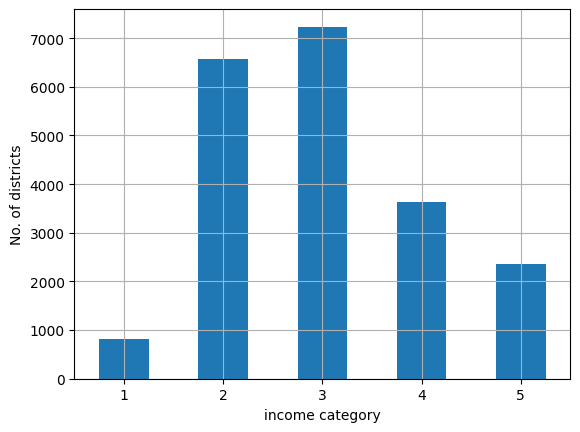

In [10]:
df['income_category']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
df['income_category'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("income category")
plt.ylabel("No. of districts")
plt.show()


Now we can do stratified split using income , either use stratifiledshufflesplit from model selection ( it can do multiple split, would be use in cross validation later ) or there is attr. in train_test_split use that

In [11]:
strat_train_set, strat_test_set=train_test_split(df,test_size=0.2,stratify=df['income_category'],random_state=42)
print(len(strat_train_set))
print(len(strat_test_set))

16512
4128


In [12]:
strat_test_set['income_category'].value_counts()

income_category
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [13]:
# Removing the extra column made by mistake
# df=df.drop(columns=['imcome_category'])
# df.head(5)

In [14]:
df_train=strat_train_set.copy()

In [15]:
len(df_train)

16512

Visualizing geographical data

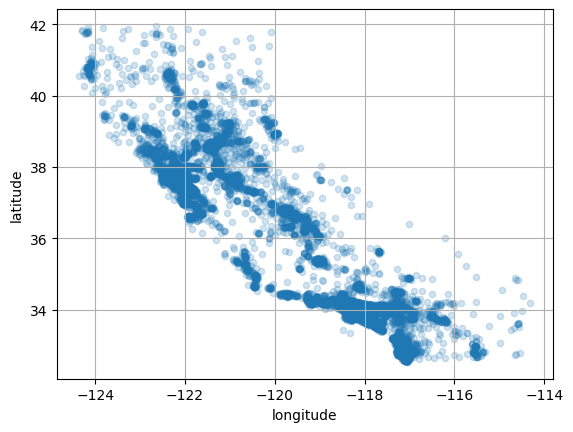

In [16]:
df_train.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

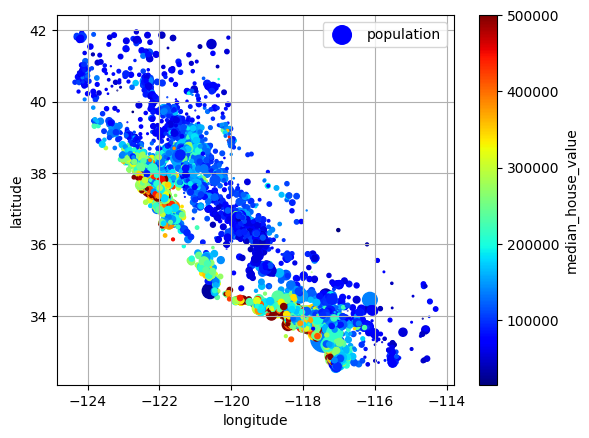

In [17]:
df_train.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=df_train["population"]/100,label="population",c="median_house_value",cmap="jet",colorbar=True,legend=True)

Next is to visualize the input attributes correlation with label output using corr() also called as pearson's r
but it is only work for continuous values so we can change the categorical values to continuous as well

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the ocean_proximity column
df_train['ocean_proximity'] = label_encoder.fit_transform(df_train['ocean_proximity'])
print(df_train)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  media

# ***Find the linear relation between attributes***

In [19]:
corr_matrix=df_train.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   
ocean_proximity     -0.285467  0.196242            0.113464    -0.018921   
income_category     -0.016281 -0.078768           -0.139314     0.221745   

                    total_bedrooms  population  households  median_income  \
longitude 

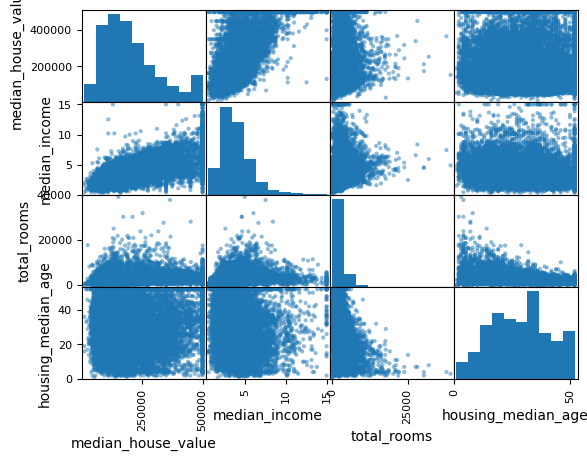

In [20]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(df_train[attributes])
plt.show()

In [21]:
df_train['rooms_per_house']=df_train['total_rooms']/df_train['households']
df_train['bedroom_ratio']=df_train['total_bedrooms']/df_train['total_rooms']
df_train['people_per_house']=df_train['population']/df_train['households']

In [22]:
corr_matrix=df_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   
ocean_proximity     -0.285467  0.196242            0.113464    -0.018921   
income_category     -0.016281 -0.078768           -0.139314     0.221745   
rooms_per_house     -0.028374  0.107665           -0.147184     0.127549   
bedroom_rati

Now sepreate the labels with the input parameters

In [23]:
df_train_labels=df_train['median_house_value'].copy()
print(df_train_labels)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64


In [24]:
df_train=df_train.drop('median_house_value',axis=1)

# ***Data Cleaning***

Now we have seprated the data with the labels already , now clean the data before feeding it to the ML model. Few are the steps we can do in data cleaning part:
1. Handle the Null numerical values either by removing that row or the attribute or just imputing the value with mean , median or mode etc.. . We can either use pandas fillna(), dropna(), drop() or we can use sklearn simpleimputer , KNN imputer, Iterative imputer depending on the use case

In [25]:
# we are using simpleimputer here
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=df_train.select_dtypes(include=[np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.00000000e+00,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [27]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.00000000e+00,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [28]:
X=imputer.transform(housing_num)


In [29]:
X

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [30]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [31]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,4.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,4.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0.0,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.0,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.0,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0.0,6.297405,0.183835,2.411178


2. Handle categorial  or text values like ocean proximity

df_train which is copy of original split data, ocean_proximity is already been labelencoded before , what we can do it , put it to original form and thn try using different encoding methods to explore how to handle categorical values

In [32]:
df_train['ocean_proximity']=strat_train_set['ocean_proximity']
df_train.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category,rooms_per_house,bedroom_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,0.182692,3.167241


In [33]:
housing_cat=df_train[['ocean_proximity']]
print(housing_cat.head(5))
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
# here the issue is these category is not in order , so using ordinal encoder would give wrong representation of the data, we can try using one hot encoding that will give dummy attributes


      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
[[1.]
 [4.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [34]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
housing_cat_1hot=one_hot_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


In [35]:
# because by default OneHotEncoder give output in SciPy sparse matrix we can convert it into numpy array using toarray()
# sparse matrix is good with large data it saves lot of memory and speed up the process
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
# pandas get_dummies method also convert each categorical features into one hot representations with one binary features per categories
df_test=pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
pd.get_dummies(df_test).astype(int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [38]:
one_hot_encoder.fit_transform(df_test)

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [39]:
one_hot_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [40]:
one_hot_encoder.get_feature_names_out()

array(['ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY'], dtype=object)

# ***Feature Scaling and Transformation***

most ML algo dont perform well if the attr. value is at different scale , that is why feature scaling is one of the most important transformation needed.There are two ways to do it:
1. MinMax Scaling(Normalization)- For each attr. values are shifted or rescale so they end up ranging from 0 to 1( neural network works best for zero mean inputs so range -1 to 1 is preferred)
2. Standardization: it substract the mean from the value then it divides the result with standard deviation

Unless Normalization, standardization affect less by outliers


Regardless, if features are heavy tailed both will not work as good . so before even scaling the feature ; transform it to shirk the heavy tail

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)
print(housing_num_min_max_scaled)

[[-0.42430279  0.27098831  0.09803922 ... -0.93812413 -0.76492527
  -0.99601454]
 [ 0.41832669 -0.88310308 -0.76470588 ... -0.91764876 -0.86507937
  -0.99689148]
 [ 0.05776892 -0.39851222  0.68627451 ... -0.93943828 -0.79645653
  -0.99753585]
 ...
 [-0.6752988   0.25398512  0.84313725 ... -0.95766361 -0.70045576
  -0.99682856]
 [-0.67131474  0.22635494 -0.49019608 ... -0.92659441 -0.81369959
  -0.99723352]
 [-0.55976096  0.57917109  0.01960784 ... -0.93824742 -0.76500875
  -0.99600805]]


In [44]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)
print(housing_num_std_scaled)

[[-0.94135046  1.34743822  0.02756357 ...  0.01739526 -0.12355538
   0.00622264]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.56925554 -0.9090609
  -0.04081077]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.01802432 -0.37085412
  -0.07537122]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.5092404   0.38207698
  -0.03743619]
 [-1.56080303  1.2492109  -1.1653327  ...  0.32814891 -0.50609094
  -0.05915604]
 [-1.28105026  2.02567448 -0.13148926 ...  0.01407228 -0.12421016
   0.00657083]]


To tranform long tailed features ,one way is to replace the value with squareroot or logarithm of it
Another way is **Bucketizing** the feature.

We also need to transform **multimodal distribution** feature. we can use radial bias function(rbf) it depends only on the distance between input and fixed point. the most commonly used rbf is gaussian rbf.

In [45]:
from sklearn.metrics.pairwise import rbf_kernel
age_siml_35=rbf_kernel(df_train[['housing_median_age']],[[35]],gamma=0.1)

In [46]:
age_siml_35

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])